# <p style="padding:15px;background:yellow;text-align:center;text-decoration:underline">Assigment 7<p>

## - Import Libraries

Import necessary libraries used in these assignment.

In [1]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

## - Read File (without header) given a delimeter

Reads a file with a given delimeter and returns the converted numpy array.
<br>
Default when no delimeter is given it reads file as in csv format.

In [2]:
def readFile(trainFile,seperator=",",sample=False):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
        if sample:
            data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

## -Train Test split

Given a percentage, it will split out the data into train dataset and test dataset.

In [3]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

## Part-3 Linear regression to predict the probablity of getting the admit.

Following **Error Measures** have been used under part-2 of this question

**Mean Absolute Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}|y_{actual}-y_{predicted} | $$
<hr>

**Mean Square Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}(y_{actual}-y_{predicted} ){^2} $$

<hr>

**Mean Percentage Error:**
$$ MAE = \frac{100\%}{n}\sum_{\forall y}\frac{(y_{actual}-y_{predicted} )}{y_{actual}} $$


In [4]:
# function return Mean absolute Value
def MAE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=abs(actual-predicted)
    print("Mean Absolute Error = ",error/len(testYs))

In [5]:
# function return Mean square error
def MSE(testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)**2
#     print("Mean Square Error = ",error/len(testYs))
    return error/len(testYs)

In [6]:
# function return Mean percentage error
def MPE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)/actual
    print("Mean Percentage Error = ",100*error/len(testYs))

### 3.1. Predicting probabiliy of getting admit

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\beta_{0}+\beta_{1}X_1+\beta_{2}X_2+....+\beta_{n}X_n+\epsilon$$

Then using matrix calculus we find that the least square estimate for $\beta$ is given by:

$$B=((X{^T}X){^-1}X{^T}Y)$$

Hence the least square regession line can be given by
$$Y=X\beta$$

In [192]:
import copy
def predictProbAdmit(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        test=pd.read_csv(testFile).values
    
#     otest=copy.deepcopy(test)
#     otrain=copy.deepcopy(train)
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
#     if forGraph:
#         test=train
#         testY=trainY
#         otest=otrain
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(0,200)]
#     lambdaVal=np.linspace(5,15,1000)
    for i in lambdaVal:
        y=np.transpose(np.matrix(trainY))
        X=np.matrix(train)
        XT=np.transpose(X)
        iden=np.identity(XT.shape[0])*i
        iden[0][0]=0
        inverse=np.linalg.inv(XT*X+iden)
        coefficents=inverse*XT*y
        predictedValid=np.array(test*coefficents)
        predictedTrain=np.array(train*coefficents)
#         coefficents=np.array(coefficents)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.title("Ridge regression")
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    print(lambdaVal[np.argmin(mseErrorsValid)])
    plt.legend(loc=4)
    plt.show()


10


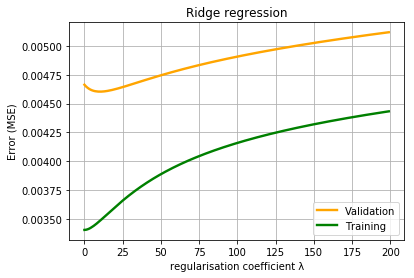

In [193]:
#with test data file as last parameter
# printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv"))

#evaluation on 20% validation data
# printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80))
predictProbAdmit("AdmissionDataset/data.csv",80)
# predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")

1


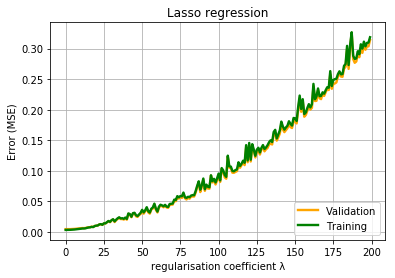

In [304]:
import copy
def predictProbAdmitGD(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        test=pd.read_csv(testFile).values
    
#     otest=copy.deepcopy(test)
#     otrain=copy.deepcopy(train)
    
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    train=(train-train.mean(axis=0))/(train.std(axis=0))
    test=(test-test.mean(axis=0))/(test.std(axis=0))
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    
    test=test[:,independentVariable]
   
    if forGraph:
        test=train
        testY=trainY
        otest=otrain
        
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(200)]
#     lambdaVal=np.linspace(1,20,200)
    for lambdaV in lambdaVal:
        learningR=0.1
        epochs=1000
        theta=np.zeros((train.shape[1],1))
        m=len(trainY)    

        trainY=trainY.reshape(-1,1)
        testY=testY.reshape(-1,1)

        for i in range(epochs):
            predictions=np.dot(train,theta)
            theta=theta-(1/m)*learningR*(train.T.dot((predictions-trainY))+lambdaV*np.sign(theta))

        predictedTrain=np.dot(train,theta)
        predictedValid=np.dot(test,theta)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    print(lambdaVal[np.argmin(mseErrorsValid)])
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.title("Lasso regression")
    plt.legend(loc=4)
    plt.show()

predictProbAdmitGD("AdmissionDataset/data.csv",80)

In [264]:
import copy
from sklearn.model_selection import KFold
def kFold(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,testFinal=splitTrainTest(data,percent)
    
    if testFile:
        testFinal=pd.read_csv(testFile).values
    
    train[:,0]=1
    ######################### K-Folds #####################
    
    kValues=[i for i in range(2,len(train)+1)]
#     kValues=[2,3,4,6]
    lambdaV=1
    kFoldAvgError=[]
    for k in kValues:
        print(k)
        mseErrorsValid=[]
        mseErrorsTrain=[]
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(train)
        for train_index, test_index in kf.split(train):
#             print("TRAIN:", len(train_index), "TEST:", len(test_index))
            testY=train[test_index,targetIndex]
            trainY=train[train_index,targetIndex]

    #         test[:,0]=1 #changeing first column to constant so it can be used for intercept

            trainX=train[train_index]
            trainX=trainX[:,independentVariable]
            testX=train[test_index]
            testX=testX[:,independentVariable]

            y=np.transpose(np.matrix(trainY))
            X=np.matrix(trainX)
            XT=np.transpose(X)
            iden=np.identity(XT.shape[0])*lambdaV
            iden[0][0]=0
            inverse=np.linalg.inv(XT*X+iden)
            coefficents=inverse*XT*y
            predictedValid=np.array(testX*coefficents)
    #         predictedTrain=np.array(train*coefficents)
            mseErrorsValid.append(MSE(testY,predictedValid))

        kFoldAvgError.append(np.average(mseErrorsValid))
    ######################### K-Folds #####################
    
    
    
    plt.xlabel("Errors (MSE) vs folds")
    plt.ylabel("Avg Error (MSE)")
    plt.title("Folds")
    plt.grid(True)
    plt.plot(kValues,kFoldAvgError,color="orange",linewidth="2.4",label="Validation")
#     plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=4)
    plt.show()


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

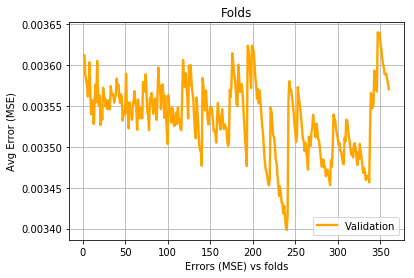

In [262]:
kFold("AdmissionDataset/data.csv",80)

In [214]:

data=pd.read_csv("AdmissionDataset/data.csv").values
train,test=splitTrainTest(data,80)


TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
TRAIN: 324 TEST: 36
